# Libraries

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Import matplotlib, seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Modeling and Evaluation
from prophet import Prophet
from sklearn.metrics import mean_squared_error

# Loading the Dataset

In [ ]:
!pip install gdown

In [2]:
import gdown
# drive.google.com/file/d/1eSNIIMDCbXx-H0fVNZ6wl5ROEdG_vUW1/view?usp=sharing
# 'FILE_ID' is whatever is between /d/ and /view?
file_id = '1eSNIIMDCbXx-H0fVNZ6wl5ROEdG_vUW1'
output_name = 'air_quality.csv'  # Name for the downloaded file

# Construct the download URL
url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
gdown.download(url, output_name, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1eSNIIMDCbXx-H0fVNZ6wl5ROEdG_vUW1
To: /content/air_quality.csv
100%|██████████| 36.4M/36.4M [00:00<00:00, 183MB/s]


'air_quality.csv'

In [43]:
# Load the downloaded dataset
data = pd.read_csv('/content/air_quality.csv')

data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [5]:
data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


# Data Preprocessing

## Converting dataset to proper datetime format

In [6]:
data.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [44]:
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']]) # Combine Columns into Datetime Format
data.drop(['No', 'year', 'month', 'day', 'hour'], axis=1, inplace=True) # Drop the original columns
data.set_index('datetime', inplace=True) # Set the datetime column as the index
data.sort_index(inplace=True)# Sort by datetime (optional, but good practice)
data.head(40)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01 00:00:00,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
2013-03-01 00:00:00,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 00:00:00,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
2013-03-01 00:00:00,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
2013-03-01 00:00:00,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
2013-03-01 00:00:00,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
2013-03-01 00:00:00,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou


Verify datetime format

In [ ]:
data.index  # Show a DatetimeIndex

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 00:00:00',
               '2013-03-01 00:00:00', '2013-03-01 00:00:00',
               '2013-03-01 00:00:00', '2013-03-01 00:00:00',
               '2013-03-01 00:00:00', '2013-03-01 00:00:00',
               '2013-03-01 00:00:00', '2013-03-01 00:00:00',
               ...
               '2017-02-28 23:00:00', '2017-02-28 23:00:00',
               '2017-02-28 23:00:00', '2017-02-28 23:00:00',
               '2017-02-28 23:00:00', '2017-02-28 23:00:00',
               '2017-02-28 23:00:00', '2017-02-28 23:00:00',
               '2017-02-28 23:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=420768, freq=None)

In [45]:
data.isnull().sum()

,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701
O3,13277
TEMP,398
PRES,393
DEWP,403
RAIN,390


## Handle missing datetimes and values

Visulization of Column Distributions

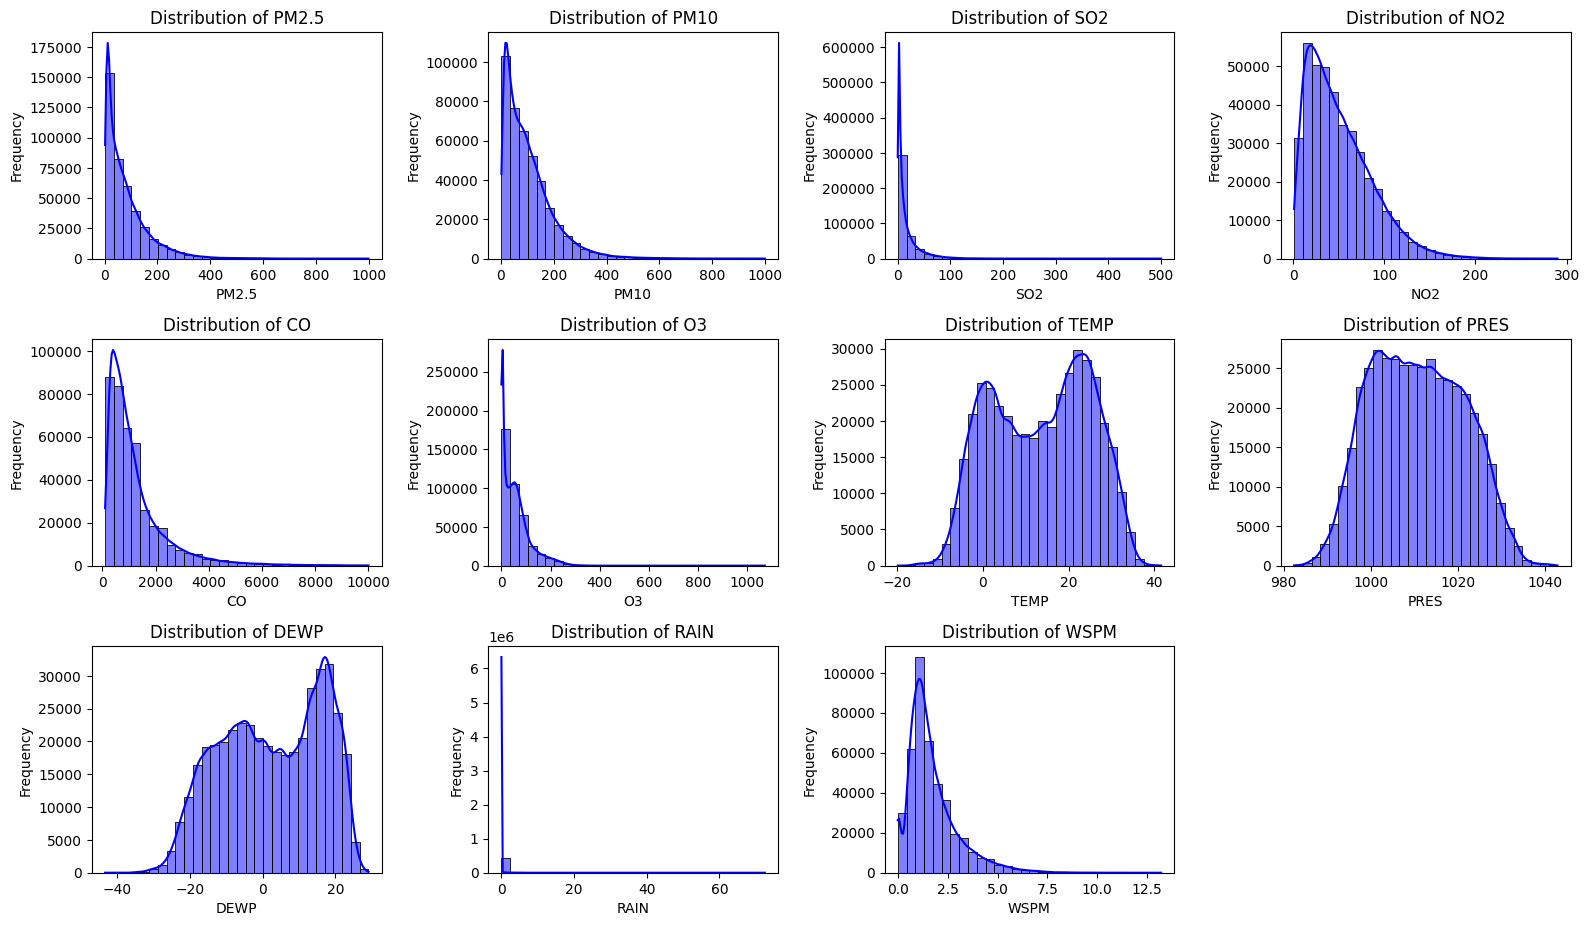

In [16]:
# Select numerical columns (excluding 'wd')
numerical_columns = [col for col in data.columns if col not in ['wd', 'station'] and pd.api.types.is_numeric_dtype(data[col])]

# Plot the distributions
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)  # Adjust the grid size as per the number of columns
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Imputation strategies:**

For meteorological data (TEMP, PRES, etc.) or pollutants (PM2.5, SO2, etc.), fill with mean, median, or interpolation

For categorical columns like wd (wind direction), use mode:

In [46]:
# Define column groups for different filling methods
median_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'RAIN', 'WSPM']
mean_cols = ['TEMP', 'DEWP']
interp_col = 'PRES'
mode_col = 'wd'

# Ensure the datetime index is sorted
data = data.sort_index()

# Extract the date from the datetime index and add it as a new column
data['date'] = data.index.to_series().dt.date

# Reset the index to avoid station being both an index and a column
data = data.reset_index()

# Fill missing values within hourly data first
def fill_missing(group):
    # Fill median for specific columns
    group[median_cols] = group[median_cols].apply(lambda x: x.fillna(x.median()), axis=0)
    # Fill mean for specific columns
    group[mean_cols] = group[mean_cols].apply(lambda x: x.fillna(x.mean()), axis=0)
    # Interpolate for the pressure column
    group[interp_col] = group[interp_col].interpolate(method='linear', limit_direction='both')
    # Fill mode for wind direction
    if group[mode_col].isnull().any():
        mode_value = group[mode_col].mode()
        if not mode_value.empty:
            group[mode_col] = group[mode_col].fillna(mode_value[0])
    return group

# Apply the function to each group (station and date)
data = data.groupby(['station', 'date']).apply(fill_missing)

# Ensure station and date are not part of the index
data = data.reset_index(drop=True)

# Aggregate data to one entry per day per station
def aggregate_daily(group):
    agg_data = {
        **{col: group[col].median() for col in median_cols},  # Median for specified columns
        **{col: group[col].mean() for col in mean_cols},      # Mean for specified columns
        interp_col: group[interp_col].mean(),                 # Mean for PRES
        mode_col: group[mode_col].mode()[0] if not group[mode_col].mode().empty else None,  # Mode for wd
    }
    return pd.Series(agg_data)

# Perform daily aggregation
daily_data = data.groupby(['station', 'date']).apply(aggregate_daily).reset_index()

# Convert 'date' back to datetime for easier handling
daily_data['date'] = pd.to_datetime(daily_data['date'])

# Ensure no missing values remain
print(daily_data.isnull().sum())


station      0
date         0
PM2.5       65
PM10        44
SO2         85
NO2        138
CO         373
O3         121
RAIN         0
WSPM         0
TEMP         0
DEWP         0
PRES         0
wd           0
dtype: int64


In [48]:
daily_data.head(15)

,station,date,PM2.5,PM10,SO2,NO2,CO,O3,RAIN,WSPM,TEMP,DEWP,PRES,wd
0,Aotizhongxin,2013-03-01,6.0,7.5,11.0,14.5,400.0,71.5,0.0,3.35,1.391667,-18.745833,1026.875000,N
1,Aotizhongxin,2013-03-02,23.5,29.5,28.5,61.0,700.0,32.0,0.0,1.35,0.616667,-15.937500,1026.850000,NE
2,Aotizhongxin,2013-03-03,87.0,118.0,65.5,90.0,1700.0,3.5,0.0,1.35,5.566667,-12.316667,1014.608333,NNE
3,Aotizhongxin,2013-03-04,15.5,33.5,18.0,43.0,500.0,55.0,0.0,2.50,9.962500,-11.683333,1017.650000,N
4,Aotizhongxin,2013-03-05,140.0,179.5,94.0,125.5,2299.0,84.0,0.0,1.30,6.291667,-7.525000,1010.900000,NE
5,Aotizhongxin,2013-03-06,230.0,265.0,118.0,145.5,2799.0,22.0,0.0,1.50,7.183333,-4.216667,1007.483333,NE
6,Aotizhongxin,2013-03-07,253.0,301.0,88.5,131.5,3899.5,17.0,0.0,1.45,9.287500,-2.033333,1002.320833,NNE
7,Aotizhongxin,2013-03-08,264.0,332.0,55.0,137.0,2450.0,84.0,0.0,1.00,9.612500,-1.150000,999.475000,ESE
8,Aotizhongxin,2013-03-09,59.0,139.0,26.0,15.5,400.0,68.0,0.0,3.30,6.983333,-10.162500,1004.391667,N
9,Aotizhongxin,2013-03-10,29.0,63.0,21.0,48.0,700.0,82.0,0.0,2.50,5.262500,-12.850000,1020.491667,SSW


In [49]:
daily_data.columns

Index(['station', 'date', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'RAIN',
       'WSPM', 'TEMP', 'DEWP', 'PRES', 'wd'],
      dtype='object')

In [50]:
# Rearrange columns: date as the first column, station as the last column
columns_order = ['date', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'RAIN',
                 'WSPM', 'TEMP', 'DEWP', 'PRES', 'wd', 'station']
daily_data = daily_data[columns_order]

# Set the 'date' column as the index
daily_data.set_index('date', inplace=True)

# Sort the DataFrame by the date index
daily_data = daily_data.sort_index()

In [51]:
daily_data.head(40)

,PM2.5,PM10,SO2,NO2,CO,O3,RAIN,WSPM,TEMP,DEWP,PRES,wd,station
date,,,,,,,,,,,,,
2013-03-01,6.0,7.5,11.0,14.5,400.0,71.5,0.0,3.35,1.391667,-18.745833,1026.875000,N,Aotizhongxin
2013-03-01,3.5,12.5,12.5,12.5,300.0,80.5,0.0,2.15,0.812500,-19.583333,1023.858333,N,Changping
2013-03-01,5.0,11.5,6.5,21.0,300.0,77.0,0.0,3.35,1.325000,-21.466667,1028.783333,NNW,Nongzhanguan
2013-03-01,8.5,14.0,10.0,26.0,400.0,52.0,0.0,3.35,1.391667,-18.745833,1026.875000,N,Wanliu
2013-03-01,8.0,9.0,3.0,12.0,400.0,70.0,0.0,2.15,0.541667,-20.637500,1029.641667,NE,Shunyi
2013-03-01,8.5,9.5,7.0,16.0,300.0,61.0,0.0,2.25,2.062500,-19.708333,1025.904167,NE,Wanshouxigong
2013-03-01,6.0,6.0,3.0,2.0,200.0,82.0,0.0,2.15,0.812500,-19.583333,1023.858333,N,Dingling
2013-03-01,7.0,12.5,7.5,23.5,400.0,67.5,0.0,3.35,1.391667,-18.745833,1026.875000,N,Guanyuan
2013-03-01,8.0,18.0,6.0,16.0,800.0,85.0,0.0,2.40,1.691667,-19.691667,1024.816667,ENE,Gucheng


In [54]:
# Fill missing values with the median for numeric columns only
numeric_columns = daily_data.select_dtypes(include='number').columns
daily_data[numeric_columns] = daily_data[numeric_columns].fillna(daily_data[numeric_columns].median())

# Verify if any missing values remain
print(daily_data.isnull().sum())

PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
RAIN       0
WSPM       0
TEMP       0
DEWP       0
PRES       0
wd         0
station    0
dtype: int64


### Daily Aggregation

- Aggregation in time series data analysis refers to the process of summarizing or condensing data over specific time intervals, such as hourly, daily, weekly, or monthly. This involves combining multiple data points within a given time window into a single representative value, such as a sum, mean, maximum, or minimum.

Purpose of Aggregation
- Reduce Noise: Aggregation smooths fluctuations, making trends and patterns more apparent.
- Align with Analysis Goals: Hourly aggregation to study diurnal patterns.Daily aggregation to analyze day-to-day trends.
- Improve Model Performance by simplifying data and reduce computational requirements while maintaining the essence of the underlying trends.
- Highlight seasonal patterns, trends, or anomalies that may not be evident at finer resolutions.

In [57]:
daily_data.to_csv('air_quality_daily_data_cleaned.csv')

In [58]:
df=daily_data.copy()

In [59]:
df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,RAIN,WSPM,TEMP,DEWP,PRES,wd,station
date,,,,,,,,,,,,,
2013-03-01,6.0,7.5,11.0,14.5,400.0,71.5,0.0,3.35,1.391667,-18.745833,1026.875000,N,Aotizhongxin
2013-03-01,3.5,12.5,12.5,12.5,300.0,80.5,0.0,2.15,0.812500,-19.583333,1023.858333,N,Changping
2013-03-01,5.0,11.5,6.5,21.0,300.0,77.0,0.0,3.35,1.325000,-21.466667,1028.783333,NNW,Nongzhanguan
2013-03-01,8.5,14.0,10.0,26.0,400.0,52.0,0.0,3.35,1.391667,-18.745833,1026.875000,N,Wanliu
2013-03-01,8.0,9.0,3.0,12.0,400.0,70.0,0.0,2.15,0.541667,-20.637500,1029.641667,NE,Shunyi


### Splitting the Dataset into Training and Test sets

To split the dataset into training and test sets, I considered the temporal nature of the data. I used a time-based split rather than a random split. This ensures that the test set includes future data relative to the training set, which is more realistic for time series forecasting and analysis.

In [60]:
df = df.sort_index() # Ensure the dataset is sorted by date
split_date = '2016-01-01'  # Define the split date for training and testing. Train data will include dates before this

# Split the data into training and test sets
train_data = df.loc[df.index < split_date]
test_data = df.loc[df.index >= split_date]

# Display the sizes of the splits
print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

# Verify the splits
print(f"Train date range: {train_data.index.min()} to {train_data.index.max()}")
print(f"Test date range: {test_data.index.min()} to {test_data.index.max()}")

Training data shape: (12432, 13)
Test data shape: (5100, 13)
Train date range: 2013-03-01 00:00:00 to 2015-12-31 00:00:00
Test date range: 2016-01-01 00:00:00 to 2017-02-28 00:00:00


In [61]:
train_data.to_csv('train_data.csv')
test_data.to_csv('test_data.csv')

# Feature Engineering

Feature engineering on the train_data dataset based on the provided guidelines involves creating new features that enhance the predictive power of the model.

In [62]:
train_data.head()

,PM2.5,PM10,SO2,NO2,CO,O3,RAIN,WSPM,TEMP,DEWP,PRES,wd,station
date,,,,,,,,,,,,,
2013-03-01,6.0,7.5,11.0,14.5,400.0,71.5,0.0,3.35,1.391667,-18.745833,1026.875000,N,Aotizhongxin
2013-03-01,3.5,12.5,12.5,12.5,300.0,80.5,0.0,2.15,0.812500,-19.583333,1023.858333,N,Changping
2013-03-01,5.0,11.5,6.5,21.0,300.0,77.0,0.0,3.35,1.325000,-21.466667,1028.783333,NNW,Nongzhanguan
2013-03-01,8.5,14.0,10.0,26.0,400.0,52.0,0.0,3.35,1.391667,-18.745833,1026.875000,N,Wanliu
2013-03-01,8.0,9.0,3.0,12.0,400.0,70.0,0.0,2.15,0.541667,-20.637500,1029.641667,NE,Shunyi


In [63]:
train_data.columns

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'RAIN', 'WSPM', 'TEMP',
       'DEWP', 'PRES', 'wd', 'station'],
      dtype='object')

Engineer Lagged Variables

Lagged variables help capture temporal dependencies in the data.

In [64]:
# Create lagged features for air quality and meteorological data
lag_features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'DEWP', 'PRES', 'WSPM']

for lag in [1, 2, 3, 7]:  # Lags for 1, 2, 3, and 7 days
    for col in lag_features:
        train_data[f'{col}_lag{lag}'] = train_data[col].shift(lag)

Create Moving Averages

Moving averages smooth out short-term fluctuations and highlight trends.

In [65]:
# Create moving averages for key air quality metrics
window_sizes = [3, 7, 14]  # 3-day, 7-day, and 14-day moving averages

for window in window_sizes:
    for col in lag_features:
        train_data[f'{col}_ma{window}'] = train_data[col].rolling(window=window).mean()

Add Time-Based Indicators

Include features that capture the temporal patterns in air quality.

In [66]:
# Extract temporal features
train_data['year'] = train_data.index.year
train_data['month'] = train_data.index.month
train_data['day'] = train_data.index.day
train_data['day_of_week'] = train_data.index.dayofweek  # 0 = Monday, 6 = Sunday
#train_data['hour'] = train_data.index.hour  # If data has hourly resolution

# Encode seasons (assuming Northern Hemisphere)
train_data['season'] = train_data['month'].apply(lambda x:
    'winter' if x in [12, 1, 2] else
    'spring' if x in [3, 4, 5] else
    'summer' if x in [6, 7, 8] else 'autumn')
train_data = pd.get_dummies(train_data, columns=['season'], drop_first=True)


Handle Missing Values in Engineered Features

Missing values may arise due to lagged or rolling operations.

In [67]:
# Fill missing values in lagged and rolling features with appropriate methods
train_data.fillna(method='bfill', inplace=True)  # Backfill as an example

Due to lack of access to data on external factors such as industrial activities, their influnce was not considered in feature engineering.

In [68]:
train_data.head(20)

,PM2.5,PM10,SO2,NO2,CO,O3,RAIN,WSPM,TEMP,DEWP,...,DEWP_ma14,PRES_ma14,WSPM_ma14,year,month,day,day_of_week,season_spring,season_summer,season_winter
date,,,,,,,,,,,,,,,,,,,,,
2013-03-01,6.0,7.5,11.0,14.5,400.0,71.5,0.0,3.35,1.391667,-18.745833,...,-19.633036,1026.529762,2.557143,2013,3,1,4,True,False,False
2013-03-01,3.5,12.5,12.5,12.5,300.0,80.5,0.0,2.15,0.812500,-19.583333,...,-19.633036,1026.529762,2.557143,2013,3,1,4,True,False,False
2013-03-01,5.0,11.5,6.5,21.0,300.0,77.0,0.0,3.35,1.325000,-21.466667,...,-19.633036,1026.529762,2.557143,2013,3,1,4,True,False,False
2013-03-01,8.5,14.0,10.0,26.0,400.0,52.0,0.0,3.35,1.391667,-18.745833,...,-19.633036,1026.529762,2.557143,2013,3,1,4,True,False,False
2013-03-01,8.0,9.0,3.0,12.0,400.0,70.0,0.0,2.15,0.541667,-20.637500,...,-19.633036,1026.529762,2.557143,2013,3,1,4,True,False,False
2013-03-01,8.5,9.5,7.0,16.0,300.0,61.0,0.0,2.25,2.062500,-19.708333,...,-19.633036,1026.529762,2.557143,2013,3,1,4,True,False,False
2013-03-01,6.0,6.0,3.0,2.0,200.0,82.0,0.0,2.15,0.812500,-19.583333,...,-19.633036,1026.529762,2.557143,2013,3,1,4,True,False,False
2013-03-01,7.0,12.5,7.5,23.5,400.0,67.5,0.0,3.35,1.391667,-18.745833,...,-19.633036,1026.529762,2.557143,2013,3,1,4,True,False,False
2013-03-01,8.0,18.0,6.0,16.0,800.0,85.0,0.0,2.40,1.691667,-19.691667,...,-19.633036,1026.529762,2.557143,2013,3,1,4,True,False,False


In [70]:
print(train_data.isnull().sum())

PM2.5            0
PM10             0
SO2              0
NO2              0
CO               0
                ..
day              0
day_of_week      0
season_spring    0
season_summer    0
season_winter    0
Length: 90, dtype: int64


In [71]:
train_data.columns

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'RAIN', 'WSPM', 'TEMP',
       'DEWP', 'PRES', 'wd', 'station', 'PM2.5_lag1', 'PM10_lag1', 'SO2_lag1',
       'NO2_lag1', 'CO_lag1', 'O3_lag1', 'TEMP_lag1', 'DEWP_lag1', 'PRES_lag1',
       'WSPM_lag1', 'PM2.5_lag2', 'PM10_lag2', 'SO2_lag2', 'NO2_lag2',
       'CO_lag2', 'O3_lag2', 'TEMP_lag2', 'DEWP_lag2', 'PRES_lag2',
       'WSPM_lag2', 'PM2.5_lag3', 'PM10_lag3', 'SO2_lag3', 'NO2_lag3',
       'CO_lag3', 'O3_lag3', 'TEMP_lag3', 'DEWP_lag3', 'PRES_lag3',
       'WSPM_lag3', 'PM2.5_lag7', 'PM10_lag7', 'SO2_lag7', 'NO2_lag7',
       'CO_lag7', 'O3_lag7', 'TEMP_lag7', 'DEWP_lag7', 'PRES_lag7',
       'WSPM_lag7', 'PM2.5_ma3', 'PM10_ma3', 'SO2_ma3', 'NO2_ma3', 'CO_ma3',
       'O3_ma3', 'TEMP_ma3', 'DEWP_ma3', 'PRES_ma3', 'WSPM_ma3', 'PM2.5_ma7',
       'PM10_ma7', 'SO2_ma7', 'NO2_ma7', 'CO_ma7', 'O3_ma7', 'TEMP_ma7',
       'DEWP_ma7', 'PRES_ma7', 'WSPM_ma7', 'PM2.5_ma14', 'PM10_ma14',
       'SO2_ma14', 'NO2_ma14', 'CO_ma14', 'O3_ma14',

In [72]:
train_data.to_csv('train_data_engineered.csv')

# Model Selection and Training

Data Preparation: filter data for a single station and parameter to predict.

 Hyperparameter Tuning

ARIMA/SARIMA: Use auto_arima for automated tuning or manually grid-search over p, d, q, P, D, Q, and S.

Prophet: Tune changepoint_prior_scale (default 0.05) to control trend flexibility.

## ARIMA
ARIMA is best suited for stationary time series.

Steps:
- Check Stationarity: Use the Augmented Dickey-Fuller (ADF) test.
- Difference the Data: Apply differencing if the data is not stationary.
- Fit the Model: Use statsmodels to fit the ARIMA model.
- Hyperparameter Tuning: Experiment with p, d, and q values.

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.2 MB/s eta 0:00:00


## SARIMA
SARIMA is suited for seasonal time series data.

Steps:
- Identify Seasonality: Use autocorrelation plots to determine the seasonal period.
- Fit the Model: Add seasonal components (P, D, Q, S).

Explanation:

SARIMA Model Parameters:

order=(p, d, q): These are the same as the ARIMA parameters:

p: Auto-regressive order
d: Differencing order to make the series stationary
q: Moving average order

seasonal_order=(P, D, Q, S): These are the seasonal components:

P: Seasonal auto-regressive order
D: Seasonal differencing order
Q: Seasonal moving average order
S: Length of the seasonal cycle (for daily data with yearly seasonality, this would be 12, assuming monthly data points)

Model Fitting: We fit the SARIMA model using SARIMAX and specify both the non-seasonal and seasonal parameters. The enforce_stationarity=False and enforce_invertibility=False allow more flexibility in model fitting.

Forecasting: We forecast the values for the length of the test set.

Plotting: We visualize the training data, test data, and SARIMA forecast.

Evaluation: We use MAE, MSE, RMSE, MAPE, and accuracy to evaluate the performance of the model.

## Prophet
Prophet is flexible and works well with missing data and outliers. It also handles holidays and seasonality.

Steps:
- Prepare Data: Prophet requires columns ds (date) and y (target variable).
- Fit the Model: Include seasonality and holidays if applicable.
- Tune Parameters: Adjust parameters like changepoint_prior_scale and seasonality modes.

In [ ]:
!pip install prophet

# Model Evaluation

Evaluate all models using metrics like:

- MAE (Mean Absolute Error)
- RMSE (Root Mean Squared Error)
- MAPE (Mean Absolute Percentage Error)

# Bonus Tasks